## Modules

In [1]:
import os
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
 
from datetime import datetime, timedelta
from itertools import product
from scipy.stats import norm

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Binary game Simulation

### Fixed-percent-betting simulation

In [2]:
def getSim_fixPctBet(initAmount=100, f=12.5, p=0.5, b=1.5, numTrials=50, numSim=400):
    """
    Obtain dictionary of equal-percent-bet simulation results.
    initAmount: initial amount for betting
    f: percent per bet
    p: winning probability
    numTrialss: number of trials of the same binary game
    numSim: number of binary simulations
    """
    # Dict for recording different series of profit/loss
    simDict = {}
    # Dict for recording different series of capital (total equity)
    amountDict = {}
    # Generate a total of `numSim`= N series of binary game result and P/L
    for num in range(numSim):
        # Generate a series of "1"/"0" with probability p
        stepFunc = lambda x: 1 if x > 0 else 0  # Lambda Function for getting "1" with a fixed prob and "0" otherwise
        signArray = np.array([stepFunc(r) for r in np.random.uniform(p - 1, p, numTrials)])
        # Series of asset growth factor based on win/loss result (EITHER (1 + b * f%) OR (1 -f%))
        trialArray = 1 + f * ((b + 1) * signArray - 1) / 100
        # Record the asset growth factor series into `simDict`
        simDict[num + 1] = trialArray
        # Array of total equity and record into `amountDict`
        amountDict[f's{num + 1}'] = initAmount * trialArray.cumprod()
    # Form dataframe from the `amountDict` and transpose, so that each row corresponds to a betting series
    dfSim = pd.DataFrame(amountDict).transpose()
    # Rename columns so that each number in column labels corresponds to the k-th trial
    dfSim = dfSim.rename(columns={k: (k + 1) for k in dfSim.columns})

    return dfSim

### Performance KPIs: winning rate, RRR (Realized reward-risk ratio), profit factor

In [3]:
def getProfitfactor(p, b):
    """Get profit factor of a binary game."""
    return round(p * b / (1 - p), 4)

def getOdds(p, pf):
    """Given fixed winning rate and profit factor, find odds (or reward-risk ratio)."""
    return pf * (1 - p) / p

def getWinrate(b, pf):
    """Given fixed odds and profit factor, find winning rate."""   
    return pf / (pf + b)

### Sample of 20 fixed-percent-betting simulations of 12 trials

In [4]:
initAmount0 = 100  # Initial capital
f0 = 20  # Fixed amount per bet
p0 = 0.5   # winning probability
b0 = 1.6   # reward-risk ratio / odds
numTrial0 = 12 # Number of trials
numSim0 = 10  # Number of simulations (how many people keep playing same game for 12 runs)

pf0 = round(getProfitfactor(p0, b0), 4)
print(f'Profit Factor = {pf0}')

dfSim0 = np.round(getSim_fixPctBet(initAmount0, f0, p0, b0, numTrial0, numSim0), 2)
dfSim0

Profit Factor = 1.6


1       2       3       4       5       6       7       8       9   \
s1    80.0   64.00   84.48   67.58   54.07   43.25   34.60   27.68   36.54   
s2   132.0  174.24  230.00  184.00  242.88  320.60  256.48  338.55  270.84   
s3    80.0   64.00   84.48  111.51  147.20  194.30  256.48  338.55  270.84   
s4    80.0  105.60  139.39  184.00  242.88  320.60  423.19  558.61  737.36   
s5    80.0  105.60   84.48   67.58   89.21  117.76  155.44  124.35   99.48   
s6   132.0  105.60  139.39  111.51   89.21   71.37   94.21  124.35  164.15   
s7    80.0   64.00   51.20   67.58   54.07   43.25   57.09   45.68   60.29   
s8   132.0  174.24  139.39  184.00  147.20  117.76   94.21   75.37   60.29   
s9    80.0  105.60   84.48  111.51   89.21  117.76   94.21  124.35  164.15   
s10  132.0  174.24  139.39  111.51   89.21   71.37   57.09   45.68   36.54   

         10      11       12  
s1    48.23   63.67    84.04  
s2   216.67  173.34   228.81  
s3   357.51  471.91   377.53  
s4   589.89  778.66  1027.83  
s5   131.32  173.34   138.67  
s6   131.32  105.05    84.04  
s7    79.59  105.05    84.04  
s8    79.59  105.05   138.67  
s9   131.32  173.34   228.81  
s10   48.23   38.59    50.93

## Equity curve plotting

### Simulation KPI

In [5]:
def getSimKPI_fixPctBet(initAmount=100, f=12.5, p=0.5, b=1.5, numTrials=50, numSim=400):
    """Obtain a dictionary of final performance KPI of simulations. """
    dfSim = getSim_fixPctBet(initAmount, f, p, b, numTrials, numSim)
    dictKPI = {}
    dictKPI['p'] = p
    dictKPI['b'] = b
    dictKPI['f'] = f
    dictKPI['profitfactor'] = round(getProfitfactor(p, b), 4)
    dictKPI['win%'] = round(100 * dfSim[dfSim[numTrials] >= initAmount].shape[0] / numSim, 2)
    dictKPI['avgAmount'] = round(dfSim[numTrials].mean(), 2)
    dictKPI['midAmount'] = round(dfSim[numTrials].median(), 2)
    dictKPI['stdAmount'] = round(dfSim[numTrials].std(), 2)

    return dfSim, dictKPI

### Standard sample: p = 0.4, b = 2.0

In [6]:
initAmount1 = 100  
f1 = 10  
p1 = 0.4   
b1 = 2.0   
numTrial1 = 50 
numSim1 = 1000  

dfSim1, dictKPI1 = getSimKPI_fixPctBet(initAmount1, f1, p1, b1, numTrial1, numSim1)
dictKPI1

{'p': 0.4,
 'b': 2.0,
 'f': 10,
 'profitfactor': 1.3333,
 'win%': 65.9,
 'avgAmount': 251.65,
 'midAmount': 162.52,
 'stdAmount': 297.51}

### Function

In [7]:
def plotSim_fixPctBet(initAmount=100, f=12.5, p=0.5, b=1.5, numTrials=50, numSim=400):
    """Plot equity curves from the betting simulations."""
    # Dataframe and KPI dict from `getSimKPI_fixPctBet()` function
    dfSim, dictKPI = getSimKPI_fixPctBet(initAmount, f, p, b, numTrials, numSim)
    # First line of diagram title
    title = f'{numSim} simulations of {numTrials}-step binary game \n'
    title += f'Winning rate {round(p, 4)}, odds {round(b, 4)}, {f}% per bet \n'

    # Percentage of final equity above or equal to initial amount
    winrate = dictKPI['win%']
    avgAmount = dictKPI['avgAmount']  # Arithmetic mean of final equity
    midAmount = dictKPI['midAmount']  # Median of final equity
    stdAmount = dictKPI['stdAmount']  # SD of final equity
    profitfactor = dictKPI['profitfactor']

    # Attach key stats to title text
    title += f'Profit factor: {profitfactor}, final winrate: {winrate}% \n'
    title += f'Final equity mean: {avgAmount}, median: {midAmount}, SD: {stdAmount}'

    # Plot figure & append title
    fig = plt.figure(figsize=(12, 9))
    fig.suptitle(title, fontsize=12)

    # Transpose the equity dataframe to plot
    dfPlot = dfSim.transpose()

    # Adopt semi-log scale for fixed-percent-betting & linear scale for fixed-amount-betting
    plt.semilogy(dfPlot)
    plt.plot(dfPlot.index, np.repeat(initAmount, numTrials), color='black', linewidth=3, linestyle='dashed')
    plt.show()

### Sample of 1000 simulations of 50-trial fixed-percent-betting trials

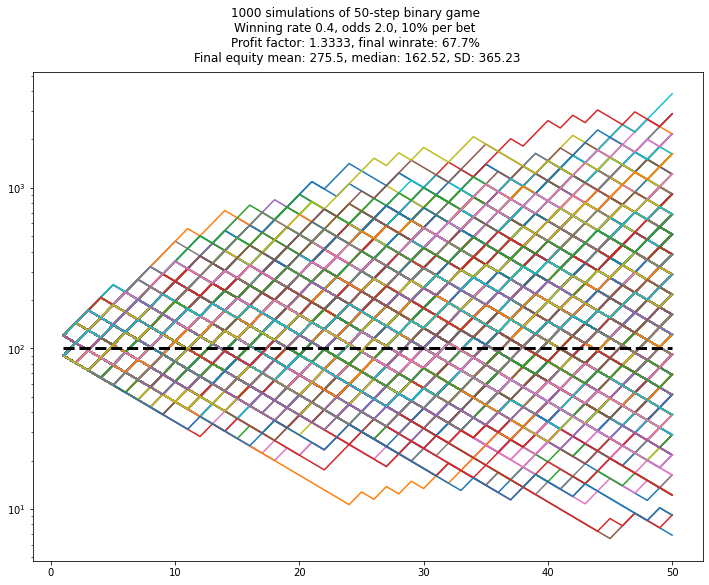

In [8]:
plotSim_fixPctBet(initAmount1, f1, p1, b1, numTrial1, numSim1)

### Raising winning rate & fix percent-per-bet, profit factor (odds reduced)

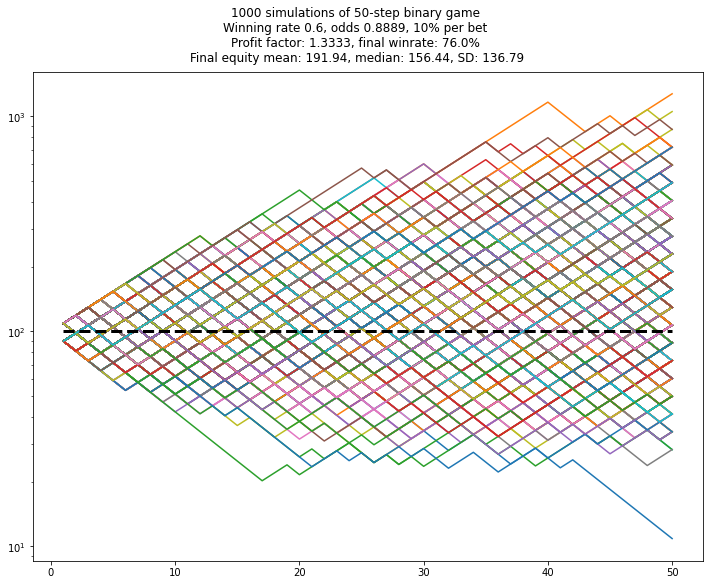

In [9]:
profitfactor1 = 4 / 3
p2 = 0.6   
b2 = getOdds(p2, profitfactor1)

plotSim_fixPctBet(initAmount1, f1, p2, b2, numTrial1, numSim1)

### Fix p & b, vary percent-per-bet

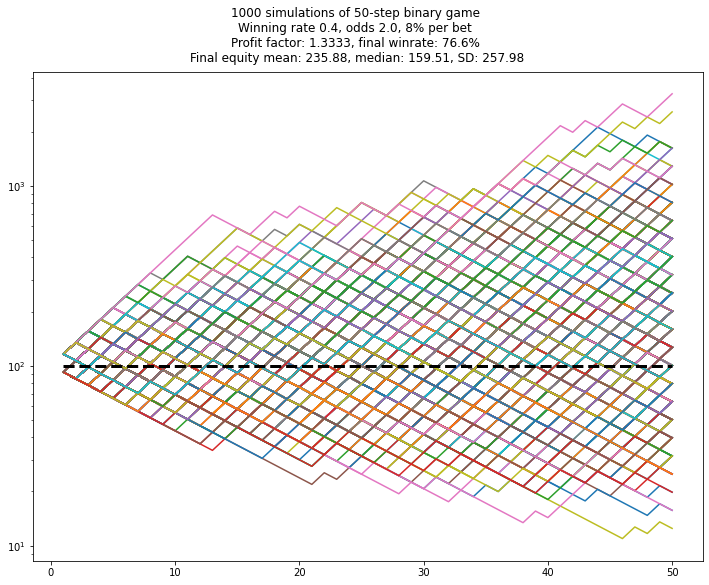

In [10]:
f2 = 8
plotSim_fixPctBet(initAmount1, f2, p1, b1, numTrial1, numSim1)

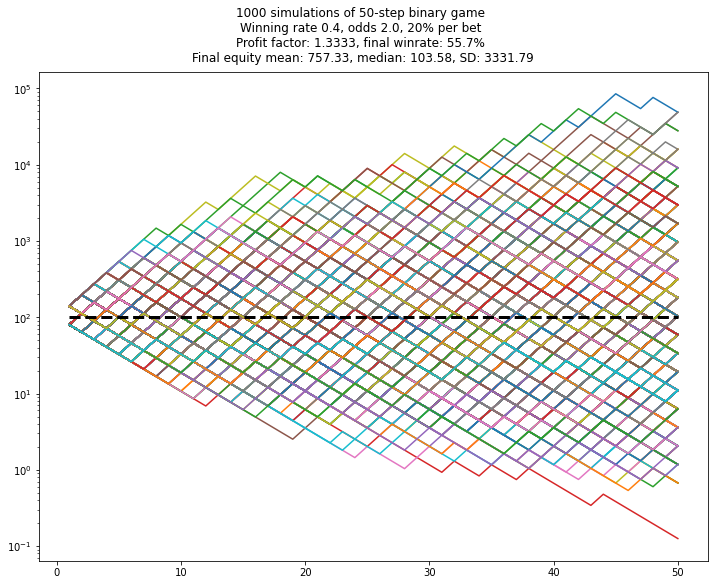

In [11]:
f3 = 20
plotSim_fixPctBet(initAmount1, f3, p1, b1, numTrial1, numSim1)

## Risk control & ruin

### percent ruin function

In [12]:
def getRuin(dfSim, initAmount=100, numTrial=50, level=0.1):
    """Obtain percentage of simulations with final amount dropping below the given equity threshold."""   
    return dfSim[dfSim[numTrial] <= level*initAmount].shape[0] / dfSim.shape[0]

### Using above (p, b) pair and vary number of trials & ruin level

In [13]:
arrLevel = np.arange(0.05, 0.55, 0.05)  ## equity threshold level from 5% to 25%
arrTrial = range(50, 300, 50)  ## Number of betting trials from 50 to 250

dfRuin1 = pd.DataFrame(columns=arrTrial, index=arrLevel)

for numTrial, level in product(arrTrial, arrLevel):
    dfSim = getSim_fixPctBet(initAmount1, f1, p1, b1, numTrial, numSim1)
    dfRuin1.loc[level, numTrial] = getRuin(dfSim, initAmount1, numTrial, level)

print(f'% of final equity below X% of initial for f = {f1}%: \n\n {dfRuin1}')

% of final equity below X% of initial for f = 10%: 

         50     100    150    200    250
0.05      0  0.004  0.005  0.005  0.006
0.10  0.002  0.004  0.008  0.021  0.017
0.15  0.004  0.021  0.027  0.027   0.01
0.20  0.013  0.042   0.03  0.028  0.028
0.25  0.029  0.037  0.064  0.055  0.033
0.30  0.059  0.063  0.065  0.068  0.054
0.35  0.048  0.061   0.08  0.069  0.052
0.40  0.098  0.102  0.078  0.101  0.072
0.45  0.101  0.097  0.126  0.082   0.06
0.50  0.087  0.135  0.102  0.085  0.094


### MDD function

In [14]:
def getSimMDD(dfSim, levelsMDD=(0.2, 0.5, 0.8, 0.9)):
    """Obtain percentage of simulations with final amount dropping below the given equity threshold."""
    # Transpose the simulation dataframe
    dfSimT = dfSim.transpose()
    numTrial = dfSim.shape[1]
    numSim = dfSim.shape[0]
    # Compute MDD
    dfMDD = pd.DataFrame(columns=dfSimT.columns)
    for col in dfSimT.columns:
        dfMDD[col] = (dfSimT[col] / dfSimT[col].cummax() - 1).cummin()
    # Tranpose back to match original shape
    dfMDD = dfMDD.transpose()
    # Compute percentage of simulations having MDD greater than the levels
    dictMDD = {}
    for value in levelsMDD:
        dictMDD[value] = dfMDD[dfMDD[numTrial] <= -value].shape[0] / numSim

    return dfMDD, dictMDD   

In [15]:
dfMDD1, dictMDD1 = getSimMDD(dfSim1)
print(f'Percentage of betting series suffering \n')

for key, value in dictMDD1.items():
    print(f'{round(100*key)}% MDD: {round(100*value, 2)}%')

Percentage of betting series suffering 

20% MDD: 100.0%
50% MDD: 66.3%
80% MDD: 6.6%
90% MDD: 0.7%


### Fix p, b and raise f to 20%

In [16]:
dfSim2, dictKPI2 = getSimKPI_fixPctBet(initAmount1, f3, p1, b1, numTrial1, numSim1)
for key, value in dictKPI2.items():
    print(f'{key}: {value}')

dfRuin2 = pd.DataFrame(columns=arrTrial, index=arrLevel)

for numTrial, level in product(arrTrial, arrLevel):
    dfSim = getSim_fixPctBet(initAmount1, f3, p1, b1, numTrial, numSim1)
    dfRuin2.loc[level, numTrial] = getRuin(dfSim, initAmount1, numTrial, level)

print(f'\nPercentage of final equity below X% of initial for f = {f1}%: \n\n {dfRuin2}')

dfMDD2, dictMDD2 = getSimMDD(dfSim2)

print(f'\nPercentage of betting series suffering \n')

for key, value in dictMDD2.items():
    print(f'{round(100*key)}% MDD: {round(100*value, 2)}%')

p: 0.4
b: 2.0
f: 20
profitfactor: 1.3333
win%: 56.0
avgAmount: 656.5
midAmount: 103.58
stdAmount: 3309.04

Percentage of final equity below X% of initial for f = 10%: 

         50     100    150    200    250
0.05  0.059  0.126  0.187  0.217  0.245
0.10  0.101  0.179  0.235  0.271  0.264
0.15  0.168  0.222  0.305  0.298  0.321
0.20  0.236  0.221  0.278  0.325  0.321
0.25  0.265  0.326  0.362  0.346  0.375
0.30  0.237  0.299  0.333  0.355  0.347
0.35   0.34  0.291  0.341  0.369  0.371
0.40  0.331  0.379   0.39  0.411  0.422
0.45  0.357  0.372  0.406  0.437  0.445
0.50  0.365   0.38  0.401  0.394  0.428

Percentage of betting series suffering 

20% MDD: 100.0%
50% MDD: 98.7%
80% MDD: 66.0%
90% MDD: 37.5%


## Optimal f% / Kelly Formula

### Expected geometric growth (= 1 + percentage-return)

In [17]:
def getExpGrowth(p=0.5, b=1.5, f=0.1, n=1):
    """
    Obtain expected geometric return of repeated trials of a binary game.
    p: winning rate
    b: odds / reward-risk-ratio
    f: fixed percent of each bet
    n: number of trials
    """
    logGrowth = p * np.log(1 + b * f) + (1 - p) * np.log(1 - f)
    
    return np.exp(n * logGrowth)

def plotExpGrowth(p=0.5, b=1.5, n=1, fMin=0, fMax=0.5, step=0.01):
    """Plot expected geometric growth given fixed winning rate & odds, and identify optimal f%."""
    # Form pandas Series of expected return of varying f%
    arrFpct = np.arange(fMin, fMax, step)
    dictGrowth = {f: getExpGrowth(p, b, f, n) - 1 for f in arrFpct}
    dfGrowth = pd.DataFrame(pd.Series(dictGrowth))
    # Plot interactive diagram of f-percent curve
    fig = px.line(x=dfGrowth.index, y=dfGrowth[0], labels={'x': 'f%', 'y': f'%return on {n} trials'})
    fig.add_trace(go.Scatter(x=dfGrowth.index, y=np.repeat(0, len(arrFpct)), name='0%'))
    # Identify optimal f%
    bestF = dfGrowth[0].idxmax()
    bestGrowth = dfGrowth[0].max()
    fig.add_trace(go.Scatter(x=(bestF, ), y=(bestGrowth, ), line_color='green', name='Opt-f%', mode='markers+text', 
                             marker_size=10, text=f'{bestF, round(bestGrowth, 4)}', textposition='bottom center'))
    
    # Show diagram
    fig.show()

### Example 1 (adopt above example p1 = 0.4, b1 = 2.0)

In [18]:
plotExpGrowth(p1, b1, n=50)

### Example 2 (Fix b = 2.0, improve p to 0.5, and reduce to 10 trials)

In [19]:
p4 = 0.5
b4 = 2.0
plotExpGrowth(p4, b4, n=10)

### Example 3 (Fix profit factor in eg.1 [4 / 3] and raise p to 0.6)

In [20]:
b2 = getOdds(p2, profitfactor1)
plotExpGrowth(p2, b2, n=50)

### Kelly formula (for discrete binary game ONLY)

In [21]:
def getKellyF(p, b):
    """Obtain the optimal f% by Kelly formula."""
    return round(max((p * b - 1 + p) / b, 0), 4)

### Kelly f% value for a bunch of (p, b) pair

In [22]:
arrP = np.arange(0.2, 0.85, 0.05)
arrB = np.arange(0.5, 4.25, 0.25)

dfKelly = pd.DataFrame()

for p, b in product(arrP, arrB):
    dfKelly.loc[b, f'{round(100*p, 2)}%'] = f'{round(100 * getKellyF(p, b), 2)}%'

dfKelly

20.0%  25.0%   30.0%   35.0%   40.0%   45.0%   50.0%   55.0%   60.0%  \
0.50    0%     0%      0%      0%      0%      0%      0%      0%      0%   
0.75    0%     0%      0%      0%      0%      0%      0%      0%   6.67%   
1.00    0%     0%      0%      0%      0%      0%      0%   10.0%   20.0%   
1.25    0%     0%      0%      0%      0%    1.0%   10.0%   19.0%   28.0%   
1.50    0%     0%      0%      0%      0%   8.33%  16.67%   25.0%  33.33%   
1.75    0%     0%      0%      0%   5.71%  13.57%  21.43%  29.29%  37.14%   
2.00    0%     0%      0%    2.5%   10.0%   17.5%   25.0%   32.5%   40.0%   
2.25    0%     0%      0%   6.11%  13.33%  20.56%  27.78%   35.0%  42.22%   
2.50    0%     0%    2.0%    9.0%   16.0%   23.0%   30.0%   37.0%   44.0%   
2.75    0%     0%   4.55%  11.36%  18.18%   25.0%  31.82%  38.64%  45.45%   
3.00    0%   0.0%   6.67%  13.33%   20.0%  26.67%  33.33%   40.0%  46.67%   
3.25    0%  1.92%   8.46%   15.0%  21.54%  28.08%  34.62%  41.15%  47.69%   
3.50    0%  3.57%   10.0%  16.43%  22.86%  29.29%  35.71%  42.14%  48.57%   
3.75    0%   5.0%  11.33%  17.67%   24.0%  30.33%  36.67%   43.0%  49.33%   
4.00  0.0%  6.25%   12.5%  18.75%   25.0%  31.25%   37.5%  43.75%   50.0%   

       65.0%   70.0%   75.0%   80.0%  
0.50      0%   10.0%   25.0%   40.0%  
0.75  18.33%   30.0%  41.67%  53.33%  
1.00   30.0%   40.0%   50.0%   60.0%  
1.25   37.0%   46.0%   55.0%   64.0%  
1.50  41.67%   50.0%  58.33%  66.67%  
1.75   45.0%  52.86%  60.71%  68.57%  
2.00   47.5%   55.0%   62.5%   70.0%  
2.25  49.44%  56.67%  63.89%  71.11%  
2.50   51.0%   58.0%   65.0%   72.0%  
2.75  52.27%  59.09%  65.91%  72.73%  
3.00  53.33%   60.0%  66.67%  73.33%  
3.25  54.23%  60.77%  67.31%  73.85%  
3.50   55.0%  61.43%  67.86%  74.29%  
3.75  55.67%   62.0%  68.33%  74.67%  
4.00  56.25%   62.5%  68.75%   75.0%

### Profit factor corresponding to above (p, b) pairs

In [23]:
dfProfitfactor = pd.DataFrame()

for p, b in product(arrP, arrB):
    dfProfitfactor.loc[b, f'{round(100*p, 2)}%'] = float(f'{round(getProfitfactor(p, b), 2)}')

dfProfitfactor

20.0%  25.0%  30.0%  35.0%  40.0%  45.0%  50.0%  55.0%  60.0%  65.0%  \
0.50   0.12   0.17   0.21   0.27   0.33   0.41   0.50   0.61   0.75   0.93   
0.75   0.19   0.25   0.32   0.40   0.50   0.61   0.75   0.92   1.12   1.39   
1.00   0.25   0.33   0.43   0.54   0.67   0.82   1.00   1.22   1.50   1.86   
1.25   0.31   0.42   0.54   0.67   0.83   1.02   1.25   1.53   1.88   2.32   
1.50   0.38   0.50   0.64   0.81   1.00   1.23   1.50   1.83   2.25   2.79   
1.75   0.44   0.58   0.75   0.94   1.17   1.43   1.75   2.14   2.62   3.25   
2.00   0.50   0.67   0.86   1.08   1.33   1.64   2.00   2.44   3.00   3.71   
2.25   0.56   0.75   0.96   1.21   1.50   1.84   2.25   2.75   3.38   4.18   
2.50   0.62   0.83   1.07   1.35   1.67   2.05   2.50   3.06   3.75   4.64   
2.75   0.69   0.92   1.18   1.48   1.83   2.25   2.75   3.36   4.12   5.11   
3.00   0.75   1.00   1.29   1.62   2.00   2.45   3.00   3.67   4.50   5.57   
3.25   0.81   1.08   1.39   1.75   2.17   2.66   3.25   3.97   4.88   6.04   
3.50   0.88   1.17   1.50   1.88   2.33   2.86   3.50   4.28   5.25   6.50   
3.75   0.94   1.25   1.61   2.02   2.50   3.07   3.75   4.58   5.62   6.96   
4.00   1.00   1.33   1.71   2.15   2.67   3.27   4.00   4.89   6.00   7.43   

      70.0%  75.0%  80.0%  
0.50   1.17   1.50    2.0  
0.75   1.75   2.25    3.0  
1.00   2.33   3.00    4.0  
1.25   2.92   3.75    5.0  
1.50   3.50   4.50    6.0  
1.75   4.08   5.25    7.0  
2.00   4.67   6.00    8.0  
2.25   5.25   6.75    9.0  
2.50   5.83   7.50   10.0  
2.75   6.42   8.25   11.0  
3.00   7.00   9.00   12.0  
3.25   7.58   9.75   13.0  
3.50   8.17  10.50   14.0  
3.75   8.75  11.25   15.0  
4.00   9.33  12.00   16.0

### Expected growth using kelly-f%, half-kelly and 2x-kelly

- Frequency inversely proportional to profit factor (trichotomy of win%, odds & frequency)

In [24]:
dfGrowth1 = pd.DataFrame()
dfGrowth2 = pd.DataFrame()
dfGrowth3 = pd.DataFrame()

numTrade = 50

for p, b in product(arrP, arrB):
    optF = dfKelly.loc[b, f'{round(100*p, 2)}%']
    optF = float(optF[:-1]) / 100
    pf = dfProfitfactor.loc[b, f'{round(100*p, 2)}%']
    n = int(numTrade / max(pf, 1))
    dfGrowth1.loc[b, f'{round(100*p, 2)}%'] = round(initAmount1 * getExpGrowth(p, b, optF, n), 2)
    dfGrowth2.loc[b, f'{round(100*p, 2)}%'] = round(initAmount1 * getExpGrowth(p, b, optF / 2, n), 2)
    dfGrowth3.loc[b, f'{round(100*p, 2)}%'] = round(initAmount1 * getExpGrowth(p, b, min([optF * 2, 0.999]), n), 2)

dfGrowth1

20.0%   25.0%   30.0%   35.0%   40.0%    45.0%    50.0%    55.0%  \
0.50  100.0  100.00  100.00  100.00  100.00   100.00   100.00   100.00   
0.75  100.0  100.00  100.00  100.00  100.00   100.00   100.00   100.00   
1.00  100.0  100.00  100.00  100.00  100.00   100.00   100.00   122.18   
1.25  100.0  100.00  100.00  100.00  100.00   100.31   128.20   204.64   
1.50  100.0  100.00  100.00  100.00  100.00   122.86   196.12   343.39   
1.75  100.0  100.00  100.00  100.00  112.57   170.39   295.08   519.45   
2.00  100.0  100.00  100.00  102.89  143.24   240.43   435.92   717.89   
2.25  100.0  100.00  100.00  118.32  187.73   332.55   581.79   959.03   
2.50  100.0  100.00  102.30  143.32  238.53   428.85   760.96  1143.52   
2.75  100.0  100.00  112.34  173.91  309.00   546.96   912.07  1215.27   
3.00  100.0  100.00  127.54  210.12  386.86   654.29   998.87  1414.19   
3.25  100.0  102.76  146.94  254.39  463.87   731.08  1178.31  1549.67   
3.50  100.0  109.54  171.12  300.63  529.93   865.05  1324.58  1602.50   
3.75  100.0  119.69  198.10  344.65  630.66   986.15  1420.44  1567.64   
4.00  100.0  131.41  226.34  405.80  657.78  1083.26  1455.19  1958.31   

        60.0%    65.0%    70.0%    75.0%    80.0%  
0.50   100.00   100.00   111.28   171.90   298.11  
0.75   107.66   156.84   266.86   458.33   647.53  
1.00   194.35   328.12   562.90   810.91  1010.41  
1.25   354.38   600.77   961.27  1226.22  1428.19  
1.50   595.39   865.24  1310.53  1609.46  1456.12  
1.75   884.73  1248.25  1634.99  1618.78  1636.14  
2.00  1073.46  1504.93  1641.24  1824.56  1576.01  
2.25  1265.18  1519.87  1855.25  1808.55  1320.15  
2.50  1599.15  1722.13  1884.21  1592.88  1721.04  
2.75  1871.35  1785.42  1732.03  2088.69  1189.52  
3.00  2033.24  1702.47  2266.73  1558.85  1436.33  
3.25  2058.27  2209.93  1807.90  1909.83   843.47  
3.50  1948.50  1867.43  2229.37  1235.68   957.70  
3.75  1731.28  2302.51  1570.17  1431.75  1080.68  
4.00  2122.69  1747.43  1841.98  1647.95  1212.57

In [25]:
dfGrowth2

20.0%   25.0%   30.0%   35.0%   40.0%   45.0%   50.0%    55.0%    60.0%  \
0.50  100.0  100.00  100.00  100.00  100.00  100.00  100.00   100.00   100.00   
0.75  100.0  100.00  100.00  100.00  100.00  100.00  100.00   100.00   105.68   
1.00  100.0  100.00  100.00  100.00  100.00  100.00  100.00   116.20   164.28   
1.25  100.0  100.00  100.00  100.00  100.00  100.23  120.52   171.18   257.85   
1.50  100.0  100.00  100.00  100.00  100.00  116.75  166.16   253.34   382.28   
1.75  100.0  100.00  100.00  100.00  109.32  149.60  226.90   348.09   518.95   
2.00  100.0  100.00  100.00  102.17  131.24  194.69  306.53   447.96   606.18   
2.25  100.0  100.00  100.00  113.55  161.40  250.22  384.39   563.26   693.61   
2.50  100.0  100.00  101.73  131.42  194.27  305.44  475.57   650.40   838.45   
2.75  100.0  100.00  109.20  152.50  237.71  370.38  551.11   688.00   956.34   
3.00  100.0  100.00  120.30  176.64  283.84  428.13  595.98   780.79  1031.04   
3.25  100.0  102.07  134.13  205.19  328.24  469.75  683.45   846.14  1051.79   
3.50  100.0  107.14  150.94  234.22  365.95  539.29  754.92   876.63  1018.01   
3.75  100.0  114.64  169.21  261.38  421.44  601.62  804.31   869.34   936.68   
4.00  100.0  123.18  187.99  297.99  438.07  652.42  826.36  1044.87  1109.53   

        65.0%    70.0%    75.0%   80.0%  
0.50   100.00   108.29   149.01  220.45  
0.75   139.77   206.35   303.64  382.35  
1.00   241.83   357.63   460.43  527.34  
1.25   380.39   533.45   626.91  682.40  
1.50   502.76   677.05   773.36  700.27  
1.75   667.78   807.22   786.13  772.29  
2.00   777.11   819.10   870.29  761.47  
2.25   791.56   909.36   875.77  676.50  
2.50   880.49   931.19   805.76  834.05  
2.75   915.21   883.41  1000.86  640.15  
3.00   891.71  1097.99   810.54  745.39  
3.25  1102.79   932.75   956.66  503.22  
3.50   977.49  1108.28   691.64  558.71  
3.75  1162.54   852.35   781.52  617.66  
4.00   945.18   973.98   879.14  680.12

In [26]:
dfGrowth3

20.0%   25.0%   30.0%   35.0%   40.0%   45.0%   50.0%   55.0%   60.0%  \
0.50  100.0  100.00  100.00  100.00  100.00  100.00  100.00  100.00  100.00   
0.75  100.0  100.00  100.00  100.00  100.00  100.00  100.00  100.00   99.75   
1.00  100.0  100.00  100.00  100.00  100.00  100.00  100.00   99.45   92.24   
1.25  100.0  100.00  100.00  100.00  100.00  100.00  100.00   95.76   77.07   
1.50  100.0  100.00  100.00  100.00  100.00  100.58   99.95   89.45   59.62   
1.75  100.0  100.00  100.00  100.00  100.51  102.53   99.97   82.19   43.81   
2.00  100.0  100.00  100.00  100.08  102.63  105.71  100.00   75.10   32.38   
2.25  100.0  100.00  100.00  101.23  106.56  109.75   99.94   67.82   22.87   
2.50  100.0  100.00  100.08  103.98  111.38  114.27  100.00   61.72   14.19   
2.75  100.0  100.00  100.91  108.09  117.85  119.29   99.94   57.01    8.33   
3.00  100.0  100.00  102.93  113.24  124.88  124.01  100.11   51.42    4.47   
3.25  100.0  100.16  106.13  119.49  132.06  128.24   99.84   46.73    2.16   
3.50  100.0  100.88  110.36  126.29  138.84  133.70  100.15   42.83    0.83   
3.75  100.0  102.40  115.48  133.13  147.67  139.26   99.88   39.78    0.17   
4.00  100.0  104.61  120.98  141.85  152.81  143.95  100.00   33.79    0.00   

       65.0%  70.0%  75.0%  80.0%  
0.50  100.00  99.06  82.23  26.77  
0.75   93.44  66.09  15.79   0.00  
1.00   67.36  22.34   0.00   0.00  
1.25   38.24   2.30   0.00   0.07  
1.50   18.23   0.00   0.00   0.56  
1.75    5.69   0.00   0.02   1.81  
2.00    0.97   0.00   0.07   4.88  
2.25    0.01   0.00   0.27  11.13  
2.50    0.00   0.01   0.88  14.96  
2.75    0.00   0.03   1.21  27.28  
3.00    0.00   0.04   3.21  33.54  
3.25    0.00   0.17   4.03  50.97  
3.50    0.00   0.22   9.09  58.47  
3.75    0.01   0.74  10.69  66.56  
4.00    0.03   0.88  12.47  75.28

## Diversification of almost-uncorrelated betting series and kelly-f%

### Example: kelly-f% and half-kelly-f% for 5 distinct betting strategies with varying (p, b)

In [27]:
pList = [0.4, 0.55, 0.35, 0.6, 0.45]
profitfactorList = [1.8, 1.65, 1.25, 2.0, 1.4]
bList = [round(getOdds(p, pf), 4) for p, pf in zip(pList, profitfactorList)]
print(f'Odds list: {bList}')

fList_opt = [round(getKellyF(p, b) * 100, 4) for p, b in zip(pList, bList)]
fList_half = [round(f / 2, 4) for f in fList_opt]
print(f'Kelly-opt-f% list: {fList_opt}')
print(f'Half-Kelly-f% list: {fList_half}')


Odds list: [2.7, 1.35, 2.3214, 1.3333, 1.7111]
Kelly-opt-f% list: [17.78, 21.67, 7.0, 30.0, 12.86]
Half-Kelly-f% list: [8.89, 10.835, 3.5, 15.0, 6.43]


### Generate 400 simulations of 50-trial binary game equity dataframe with kelly f%

In [28]:
list_dfSim1 = []
list_dfSim2 = []

initAmount2 = 100
numTrial2 = 50
numSim2 = 400

dfKPI1 = pd.DataFrame()
dfKPI2 = pd.DataFrame()

for p, b, f in zip(pList, bList, fList_opt):
    dfSim1, dictKPI1 = getSimKPI_fixPctBet(initAmount2, f1, p, b, numTrial2, numSim2)
    dfSim2, dictKPI2 = getSimKPI_fixPctBet(initAmount2, f1 / 2, p, b, numTrial2, numSim2)
    list_dfSim1.append(dfSim1)
    list_dfSim2.append(dfSim2)
    dfKPI1 = dfKPI1.append(dictKPI1, ignore_index=True)
    dfKPI2 = dfKPI2.append(dictKPI2, ignore_index=True)    
    
dfKPI1.rename(index={num: f'strat{num+1}' for num in range(5)}, inplace=True)
dfKPI2.rename(index={num: f'strat{num+1}' for num in range(5)}, inplace=True)

### Performance KPI for kelly-f% and MDD stat

In [29]:
levelsMDD0 = [0.1, 0.2, 0.5, 0.8]

dfMDDStat1 = pd.DataFrame(columns=levelsMDD0)

for df in list_dfSim1:
    dfMDD, dictMDD = getSimMDD(df, levelsMDD0)
    dfMDDStat1 = dfMDDStat1.append(dictMDD, ignore_index=True)
    
dfMDDStat1.rename(index={num: f'strat{num+1}' for num in range(5)}, inplace=True)

print(f'% of betting series suffering X% MDD under opt-f%: \n\n{dfMDDStat1}')

dfKPI1

% of betting series suffering X% MDD under opt-f%: 

        0.1     0.2     0.5     0.8
strat1  1.0  0.9975  0.5325  0.0250
strat2  1.0  0.9675  0.2900  0.0025
strat3  1.0  1.0000  0.8200  0.1300
strat4  1.0  0.9425  0.1375  0.0050
strat5  1.0  1.0000  0.5825  0.0475


avgAmount       b     f  midAmount     p  profitfactor  stdAmount  \
strat1    1131.57  2.7000  10.0     505.07  0.40        1.8000    1927.08   
strat2     410.88  1.3500  10.0     270.69  0.55        1.6500     401.10   
strat3     209.40  2.3214  10.0     107.45  0.35        1.2500     295.00   
strat4     686.27  1.3333  10.0     519.45  0.60        1.9999     615.02   
strat5     289.50  1.7111  10.0     169.02  0.45        1.4000     323.73   

         win%  
strat1  91.00  
strat2  93.00  
strat3  57.25  
strat4  98.00  
strat5  69.75

### Performance KPI for half-kelly-f%

In [30]:
dfMDDStat2 = pd.DataFrame(columns=levelsMDD0)

for df in list_dfSim2:
    dfMDD, dictMDD = getSimMDD(df, levelsMDD0)
    dfMDDStat2 = dfMDDStat2.append(dictMDD, ignore_index=True)
    
dfMDDStat2.rename(index={num: f'strat{num+1}' for num in range(5)}, inplace=True)

print(f'% of betting series suffering X% MDD under opt-f%: \n\n{dfMDDStat2}')

dfKPI2

% of betting series suffering X% MDD under opt-f%: 

           0.1     0.2     0.5  0.8
strat1  0.9975  0.8700  0.0475  0.0
strat2  0.9750  0.6300  0.0075  0.0
strat3  1.0000  0.9625  0.2125  0.0
strat4  0.9325  0.4325  0.0025  0.0
strat5  0.9950  0.8850  0.0750  0.0


avgAmount       b    f  midAmount     p  profitfactor  stdAmount  \
strat1     316.79  2.7000  5.0     270.16  0.40        1.8000     210.56   
strat2     204.92  1.3500  5.0     179.30  0.55        1.6500      92.05   
strat3     145.94  2.3214  5.0     119.02  0.35        1.2500      85.49   
strat4     269.99  1.3333  5.0     248.49  0.60        1.9999     111.96   
strat5     166.61  1.7111  5.0     144.74  0.45        1.4000      89.23   

         win%  
strat1  94.75  
strat2  95.00  
strat3  68.75  
strat4  98.00  
strat5  76.75

### Use equal-weighted allocation to obtain 400 simulations of strategy portfolio

In [31]:
weightList = [0.2] * 5

dfSim_All1 = sum([dfSim * weight for dfSim, weight in zip(list_dfSim1, weightList)]) 
dfSim_All2 = sum([dfSim * weight for dfSim, weight in zip(list_dfSim2, weightList)]) 

dfSim_All1.iloc[:10, -5:]

46           47           48           49           50
s1    601.559547   587.928568   648.396426   721.145129   739.238240
s2    222.051991   252.042019   238.374827   265.753490   278.645038
s3   1153.724904  1068.274420  1084.982369  1164.778923  1381.821150
s4    191.892233   202.548105   201.605739   193.899641   218.006908
s5   1142.476266  1342.129477  1321.352007  1226.902037  1132.073213
s6    128.214503   124.658983   130.590571   143.142321   155.764022
s7    363.446724   411.111553   408.738223   477.711964   514.281448
s8    517.565553   477.155583   517.973961   582.863090   657.317432
s9    550.836971   557.153532   616.293635   662.407271   733.972468
s10   341.918571   397.408446   415.067932   480.836619   509.112573

### KPI for first portfolio (of 5 kelly-f% strats) & compare to cell[33]

In [32]:
# Performance KPIs of kelly-f% portfolio
dictKPI_All1 = {}

dictKPI_All1['win%'] = round(100 * dfSim_All1[dfSim_All1[numTrial2] >= initAmount2].shape[0] / numSim2, 2)
dictKPI_All1['avgAmount'] = round(dfSim_All1[numTrial2].mean(), 2)
dictKPI_All1['midAmount'] = round(dfSim_All1[numTrial2].median(), 2)
dictKPI_All1['stdAmount'] = round(dfSim_All1[numTrial2].std(), 2)      

# Performance KPIs of half-kelly-f% portfolio
dictKPI_All2 = {}

dictKPI_All2['win%'] = round(100 * dfSim_All2[dfSim_All2[numTrial2] >= initAmount2].shape[0] / numSim2, 2)
dictKPI_All2['avgAmount'] = round(dfSim_All2[numTrial2].mean(), 2)
dictKPI_All2['midAmount'] = round(dfSim_All2[numTrial2].median(), 2)
dictKPI_All2['stdAmount'] = round(dfSim_All2[numTrial2].std(), 2)      

# Combined
dfKPI_All = pd.DataFrame(columns=['win%', 'avgAmount', 'midAmount', 'stdAmount'])
dfKPI_All = dfKPI_All.append(dictKPI_All1, ignore_index=True)
dfKPI_All = dfKPI_All.append(dictKPI_All2, ignore_index=True)
dfKPI_All = dfKPI_All.transpose()
dfKPI_All = dfKPI_All.rename(columns={0: 'opt-f%', 1: 'half-opt-f%'})

# MDD stats
dfMDD_All1, dictMDD_All1 = getSimMDD(dfSim_All1, levelsMDD0)
dfMDD_All2, dictMDD_All2 = getSimMDD(dfSim_All2, levelsMDD0)

for key, value in dictMDD_All1.items():
    dfKPI_All.loc[f'%(Sim)_{round(key*100, 0)}%MDD', 'opt-f%'] = value
    
for key, value in dictMDD_All2.items():
    dfKPI_All.loc[f'%(Sim)_{round(key*100, 0)}%MDD', 'half-opt-f%'] = value
    
dfKPI_All


opt-f%  half-opt-f%
win%              99.7500     100.0000
avgAmount        545.5300     220.8500
midAmount        440.7800     211.8600
stdAmount        402.3100      53.8800
%(Sim)_10.0%MDD    0.9625       0.3275
%(Sim)_20.0%MDD    0.4450       0.0025
%(Sim)_50.0%MDD    0.0075       0.0000
%(Sim)_80.0%MDD    0.0000       0.0000

### Check correlation of random simulation (of same index number) of each strategy

In [33]:
numStrat = np.random.randint(1, numSim2 + 1)

dfStrat = pd.DataFrame()
numIndex = 1

for df in list_dfSim1:
    dfStrat = pd.concat([dfStrat, df.loc[[f's{numStrat}']]], axis=0)
    dfStrat.rename(index={f's{numStrat}': f'strat{numIndex}'}, inplace=True)
    numIndex += 1
    
dfStrat = dfStrat.transpose()

for col, b, f in zip(dfStrat.columns, bList, fList_opt):
    dfStrat[col] = np.round(dfStrat[col] / dfStrat[col].shift(1), 4)

dfStrat.tail(10)

strat1  strat2  strat3  strat4  strat5
41    0.90   1.135  0.9000  1.1333  0.9000
42    1.27   1.135  0.9000  1.1333  0.9000
43    0.90   1.135  1.2321  1.1333  1.1711
44    1.27   1.135  0.9000  0.9000  0.9000
45    0.90   1.135  0.9000  0.9000  0.9000
46    0.90   1.135  1.2321  0.9000  0.9000
47    0.90   1.135  1.2321  1.1333  0.9000
48    0.90   0.900  1.2321  1.1333  0.9000
49    1.27   1.135  1.2321  1.1333  0.9000
50    0.90   1.135  0.9000  0.9000  0.9000

### Check correlation of returns

- For degree of freedom around 50, critical value of dependence (at sig level 0.05) is +/- 0.231
- IF corr coefficient lies in range (-0.231, 0.231), would accept that two series are independent

In [34]:
dfStrat.corr()

strat1    strat2    strat3    strat4    strat5
strat1  1.000000  0.149174 -0.098276 -0.130107  0.168666
strat2  0.149174  1.000000 -0.016952 -0.159901 -0.264660
strat3 -0.098276 -0.016952  1.000000  0.046983  0.001704
strat4 -0.130107 -0.159901  0.046983  1.000000  0.016071
strat5  0.168666 -0.264660  0.001704  0.016071  1.000000